In [ ]:
!pip install -q tensorflow==2.0.0
!pip install adversarial-robustness-toolbox[all]
!pip install h5py==2.10.0
!pip install Pillow

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0rc0)
ERROR: No matching distribution found for tensorflow==2.0.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Insert your current Google Drive folder
PATH = '/content/gdrive/MyDrive/Gruppo_AI4C - Copy'
%cd $PATH/plots

/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots


In [ ]:
import librosa

import numpy as np
import pandas as pd
import IPython.display as ipd

from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
if tf.__version__[0] != '2':
    raise ImportError('This notebook requires TensorFlow v2.')
training = False
if training is False:
  tf.compat.v1.disable_eager_execution()
else:
  tf.compat.v1.enable_eager_execution()
from tensorflow import keras
import pickle

# Audio model
from model import SpeakerID

import matplotlib.pyplot as plt
import collections
import pandas as pd

In [ ]:
# Settings
checkpoint_path = 'resnet18_mel_25_10_norm.h5'
csv_path = 'database.csv'

# Read db file list
database = pd.read_csv(csv_path)

# Compute labeles
labeler = LabelEncoder()
labeler.fit(database['VoxCeleb1 ID'])

# Load the model
input_shape = (None, 1)
model = SpeakerID(input_shape, checkpoint_path, n_classes=1251)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Instructions for updating:
Colocations handled automatically by placer.


# Feature extraction (do not run)

In [ ]:
# Load the model
input_shape = (None, 1)
model = SpeakerID(input_shape, checkpoint_path, n_classes=1251)

In [ ]:
%cd '/content/gdrive/MyDrive/Gruppo_AI4C'
import pandas as pd
file = pd.read_csv(csv_path, index_col=0)
file = file.drop('video', axis=1)
file = file.drop('VGGFace1 ID', axis=1)
file = file.drop('Gender', axis=1)
file = file.drop('Nationality', axis=1)
file = file.drop('Set', axis=1)
file = file.drop('split', axis=1)
file

In [ ]:
%cd vox1_test_wav/wav
import os
list_id = set(os.listdir())
file = file[file['VoxCeleb1 ID'].isin(list_id)]

In [ ]:
true_class = 'id10300'
true_class_df = file[file['VoxCeleb1 ID'] == true_class]

In [ ]:
file.loc[file[file['VoxCeleb1 ID'] != true_class].sample(frac=0.15).index, 'split'] = 2
file.loc[file[(file['VoxCeleb1 ID'] != true_class) & (file['split'].isna())].sample(frac=0.15).index, 'split'] = 3
file.loc[(file['VoxCeleb1 ID'] != true_class) & (file['split'].isna()), 'split'] = 1
file.loc[file[file['VoxCeleb1 ID'] == true_class].sample(frac=0.15).index, 'split'] = 2
file.loc[file[(file['VoxCeleb1 ID'] == true_class) & (file['split'].isna())].sample(frac=0.15).index, 'split'] = 3
file.loc[(file['VoxCeleb1 ID'] == true_class) & (file['split'].isna()), 'split'] = 1

In [ ]:
print("Train: " + str(len(file[file['split']==1])))
print("Val: " + str(len(file[file['split']==2])))
print("Test: " + str(len(file[file['split']==3])))

In [ ]:
print(file.groupby(['VoxCeleb1 ID']).size())

In [ ]:
print('### id')
print(file.groupby(['VoxCeleb1 ID']).size())
print('\n\n### split')
print(file.groupby(['split']).size())
print('\n\n### id and split')
for x in file.groupby(['VoxCeleb1 ID', 'split']).size():
  print(x)

In [ ]:
%cd '/content/gdrive/MyDrive/Gruppo_AI4C - Copy/vox1_test_wav/wav'
dataset_train = []
dataset_validation = []
dataset_test = []
true_class = 'id10300'

for index, row in file.iterrows():
  # Read the audio file
  x_1, _ = librosa.load(row['path'], sr=16000)
  # Create batch
  x = np.expand_dims(x_1, 0)
  # Add channels dimension
  x = np.expand_dims(x, -1)

  feature_vector = model.predict(x)[1]
  if row['VoxCeleb1 ID'] == true_class:
    if row['split'] == 1:
      dataset_train.append({'id': 1, 'feature_vector': feature_vector, 'audio': x_1, 'file_path': row['path']})
    if row['split'] == 2:
      dataset_validation.append({'id': 1, 'feature_vector': feature_vector, 'audio': x_1, 'file_path': row['path']})
    if row['split'] == 3:
      dataset_test.append({'id': 1, 'feature_vector': feature_vector, 'audio': x_1,'file_path': row['path']})
  else:
    if row['split'] == 1:
      dataset_train.append({'id': 0, 'feature_vector': feature_vector, 'audio': x_1, 'file_path': row['path']})
    if row['split'] == 2:
      dataset_validation.append({'id': 0, 'feature_vector': feature_vector, 'audio': x_1, 'file_path': row['path']})
    if row['split'] == 3:
      dataset_test.append({'id': 0, 'feature_vector': feature_vector,'audio': x_1, 'file_path': row['path']})

In [ ]:
%cd '/content/gdrive/MyDrive/Gruppo_AI4C/array'
np.save("dataset_train.npy", dataset_train)
np.save("dataset_validation.npy", dataset_validation)
np.save("dataset_test.npy", dataset_test)

# Load feature vectors

In [ ]:
%cd '/content/gdrive/MyDrive/Gruppo_AI4C - Copy/array'
dataset_train = np.load("dataset_train.npy", allow_pickle=True)
dataset_validation = np.load("dataset_validation.npy", allow_pickle=True)
dataset_test = np.load("dataset_test.npy", allow_pickle=True)

/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/array


In [ ]:
x_train_audio = np.empty(len(dataset_train), dtype=object)
x_test_audio = np.empty(len(dataset_test), dtype=object)
x_val_audio = np.empty(len(dataset_validation), dtype=object)


x_audio = [i['audio'] for i in dataset_train]
x_train = np.array(x_audio, dtype=object)
x_feature_train = np.array([np.reshape(i['feature_vector'], -1) for i in dataset_train])
y = [i['id'] for i in dataset_train]
y_train = np.array(y)

x_audio = [i['audio'] for i in dataset_test]
x_test = np.array(x_audio, dtype=object)
x_feature_test = np.array([np.reshape(i['feature_vector'], -1) for i in dataset_test])
y = [i['id'] for i in dataset_test]
y_test = np.array(y)

x_audio = [i['audio'] for i in dataset_validation]
x_val = np.array(x_audio, dtype=object)
x_feature_val = np.array([np.reshape(i['feature_vector'], -1) for i in dataset_validation])
y = [i['id'] for i in dataset_validation]
y_val = np.array(y)


In [ ]:
x_feature_train.shape

(438, 512)

In [ ]:
print('Min train: ' + str(np.amin(x_feature_train)))
print('Max train: ' + str(np.amax(x_feature_train)))
print('Min test: ' + str(np.amin(x_feature_test)))
print('Max test: ' + str(np.amax(x_feature_test)))
print('Min val: ' + str(np.amin(x_feature_val)))
print('Max val: ' + str(np.amax(x_feature_val)))

Min train: 0.0
Max train: 7.781241
Min test: 0.0
Max test: 7.2195234
Min val: 0.0
Max val: 7.3554044


# MLP Model

In [ ]:
from keras.models import Model
from keras.layers import Dense, Activation, Input

input = Input(shape=(512))
x = Dense(32, activation=tf.nn.relu)(input)
x = Dense(16, activation=tf.nn.relu)(x)
x = Dense(2)(x)
output = Activation(tf.nn.softmax)(x)
model = Model(inputs=input, outputs=output)
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512)]             0         
                                                                 
 dense (Dense)               (None, 32)                16416     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 16,978
Trainable params: 16,978
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x=x_feature_train, y=y_train, batch_size=64, epochs=30, validation_data=(x_feature_val, y_val))

Train on 438 samples, validate on 92 samples
Epoch 1/30
 64/438 [===>..........................] - ETA: 1s - loss: 0.9078 - accuracy: 0.4531

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


438/438 [==============================] - 1s 1ms/sample - loss: 0.5555 - accuracy: 0.7260 - val_loss: 0.2535 - val_accuracy: 0.9565
Epoch 2/30
438/438 [==============================] - 0s 55us/sample - loss: 0.1595 - accuracy: 0.9840 - val_loss: 0.0970 - val_accuracy: 0.9783
Epoch 3/30
438/438 [==============================] - 0s 53us/sample - loss: 0.0563 - accuracy: 0.9977 - val_loss: 0.0471 - val_accuracy: 1.0000
Epoch 4/30
438/438 [==============================] - 0s 53us/sample - loss: 0.0252 - accuracy: 0.9977 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 5/30
438/438 [==============================] - 0s 52us/sample - loss: 0.0139 - accuracy: 0.9977 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 6/30
438/438 [==============================] - 0s 49us/sample - loss: 0.0089 - accuracy: 0.9977 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 7/30
438/438 [==============================] - 0s 50us/sample - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.00

In [ ]:
pred = model.predict(x_feature_test)
pred = np.argmax(pred, axis=1)
accuracy = (pred == y_test).mean() * 100.
print('Accuracy on test set: ' + str(accuracy))

Accuracy on test set: 100.0


In [ ]:
%cd '/content/gdrive/MyDrive/Gruppo_AI4C - Copy'
model.save('model.h5')

/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy


In [ ]:
from keras.models import load_model
%cd '/content/gdrive/MyDrive/Gruppo_AI4C - Copy'
model = load_model('model.h5')

/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy


# Attacks

In [ ]:
def plot_parameter(data=None, x=None, y=None, filename=None, label=[], parameter_index=None, range_x=[0, 1], sort=False, legend=None, title=None):
  %cd '/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots'
  plt.figure(figsize=(8, 6), dpi=80)
  if data is None:
    if isinstance(x, list) and isinstance(y, list):
      for (i, (x0, y0)) in enumerate(zip(x,y)):
        if legend is not None:
          plt.plot(x0, y0, label=legend[i])
        else:
          plt.plot(x0, y0)
    else:
      plt.plot(x, y)
  else:
    if sort is True:
      data = collections.OrderedDict(sorted(data.items()))
    if parameter_index is not None:
      x = [x[int(parameter_index)] for x in data.keys()]
      plt.plot(x, list(data.values()))
    else:
      plt.plot(list(data.keys()), list(data.values()))
  plt.ylim([0, 105])
  plt.xlim(range_x)
  plt.xlabel(label[0])
  plt.ylabel(label[1])
  plt.xticks(np.arange(0, range_x[1]+0.05, 0.05))
  plt.yticks(np.arange(0, 110, 10))
  plt.grid(which='both')
  plt.legend(loc='upper right')
  if title is not None:
    plt.title(title)
  if filename is not None:
    plt.savefig(filename+'.png')

In [ ]:
from scipy.interpolate import interp1d
def smoothing(x, y, n):
  x_new = np.linspace(min(x), max(x), n)
  f = interp1d(x_plot[0], y_plot[0], kind='linear', fill_value="extrapolate")
  y_new = f(x_new)
  return x_new, y_new

In [ ]:
def compare_attacks(result1, result2):
  x1 = [x[0] for x in result1.keys()]
  x2 = list(result2.keys())

  y1 = list(result1.values())
  y2 = list(result2.values())

  data1 = dict(zip(x1, y1))
  data2 = dict(zip(x2, y2))

  od1 = collections.OrderedDict(sorted(data1.items()))
  od2 = collections.OrderedDict(sorted(data2.items()))

  x_plot = [list(od1.keys()), list(od2.keys())]
  y_plot = [list(od1.values()),list(od2.values())]
  
  return x_plot, y_plot

In [ ]:
# ART
import art
from art import config
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import FastGradientMethod, BasicIterativeMethod, ProjectedGradientDescent, DeepFool, CarliniL2Method
import collections

In [ ]:
classifier = KerasClassifier(clip_values=(0, 8), model=model, use_logits=False)

In [ ]:
logit_model = tf.keras.Model(model.input, model.layers[-2].output)
classifier_logit = KerasClassifier(model=logit_model, clip_values=(0,8))

### FGSM

In [ ]:
result_FGSM_attack = {}
for eps in np.linspace(0, 1, 100):
  FGSM_attack = FastGradientMethod(estimator=classifier, eps=eps, targeted=False)
  test_samples_adv = FGSM_attack.generate(x_feature_test)
  pred = model.predict(test_samples_adv)
  pred = np.argmax(pred, axis=1)
  perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))
  accuracy = (pred == y_test).mean() * 100.
  result_FGSM_attack[(perturbation, eps)] = accuracy

/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots


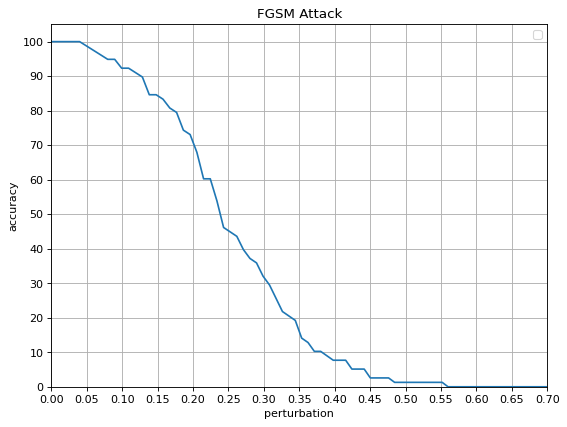

In [ ]:
plot_parameter(data=result_FGSM_attack, parameter_index=0, range_x=(0,0.7), label=('perturbation', 'accuracy'), filename='FGSM_pert_acc', title='FGSM Attack')

/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots


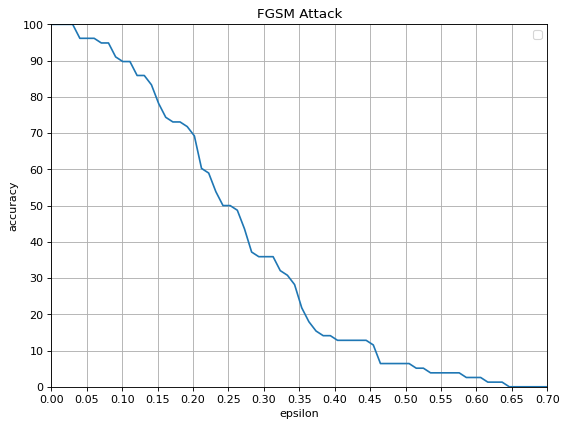

In [ ]:
plot_parameter(data=result_FGSM_attack, parameter_index=1, range_x=(0,0.7), label=('epsilon', 'accuracy'), filename='FGSM_eps_acc', title='FGSM Attack')

### BIM

In [ ]:
%%capture
result_BIM_attack = {}
x_plot = []
y_plot = []
max_iters = [3, 5, 7, 10, 20, 30]
for max_iter in max_iters:
  for eps_step in np.linspace(0.0001, 1, 100):
    epsilon = eps_step*max_iter
    BIM_attack = BasicIterativeMethod(estimator=classifier, eps=epsilon, eps_step=eps_step, max_iter=max_iter, targeted=False)
    test_samples_adv = BIM_attack.generate(x_feature_test)
    pred = model.predict(test_samples_adv)
    pred = np.argmax(pred, axis=1)
    perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))
    accuracy = (pred == y_test).mean() * 100.
    result_BIM_attack[perturbation, eps_step, max_iter] = accuracy

df = pd.DataFrame(result_BIM_attack.items(), columns=('A','accuracy'))
df[['perturbation', 'eps_step', 'max_iter']] = pd.DataFrame(df['A'].tolist(), index=df.index)
df = df.drop('A', axis=1)

x_plot = list(df.groupby('max_iter')['eps_step'].apply(list).values)
y_plot = list(df.groupby('max_iter')['accuracy'].apply(list).values)
legend_plot = list(df.groupby('max_iter').groups.keys())
legend_plot = ['max_iter: '+str(x) for x in legend_plot]

/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots


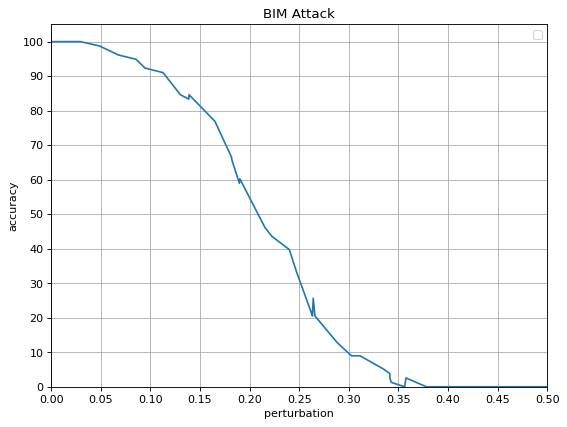

In [ ]:
plot_parameter(data=result_BIM_attack, label=('perturbation', 'accuracy'), range_x=(0,0.5), sort=True, parameter_index=0, title='BIM Attack')

/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots


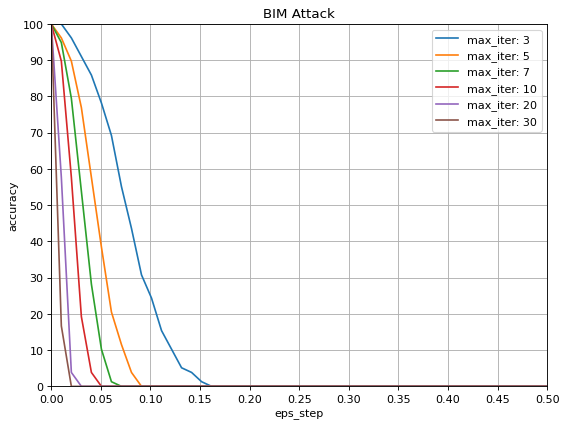

In [ ]:
plot_parameter(x=x_plot, y=y_plot, label=('eps_step', 'accuracy'),  range_x=(0,0.5), legend=legend_plot, filename='BIM_eps_step_max_iter_acc', title='BIM Attack')

### PGD

In [ ]:
%%capture
result_PGD_attack = {}
num_random_inits = [1, 3, 5, 7, 10]
max_iters = [3, 5, 7, 10, 20, 30]
for num_random_init in num_random_inits:
  for max_iter in max_iters:
    for eps_step in np.linspace(0.0001, 1, 80):
      epsilon = eps_step*max_iter
      attack = ProjectedGradientDescent(estimator=classifier, eps=epsilon, eps_step=eps_step, max_iter=max_iter, num_random_init=num_random_init, targeted=False)
      test_samples_adv = attack.generate(x_feature_test)
      pred = model.predict(test_samples_adv)
      pred = np.argmax(pred, axis=1)
      perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))
      accuracy = (pred == y_test).mean() * 100.
      result_PGD_attack[perturbation, eps_step, max_iter, num_random_init] = accuracy

/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots


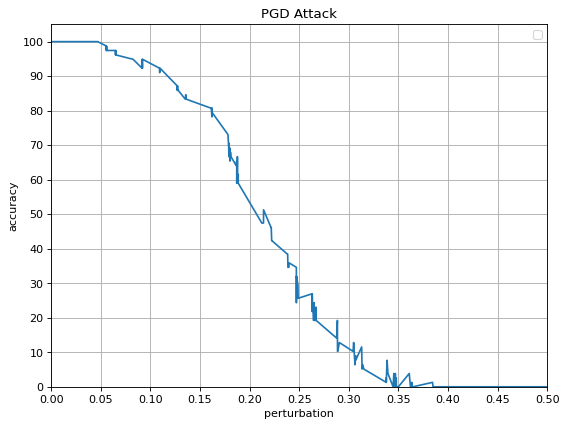

In [ ]:
plot_parameter(data=result_PGD_attack, label=('perturbation', 'accuracy'), range_x=(0,0.5), sort=True, parameter_index=0, filename='PGD_pert_acc', title='PGD Attack')

/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots
/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots
/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots
/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots
/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots


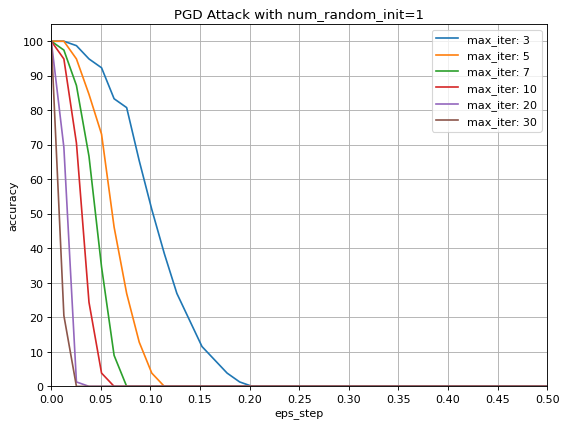

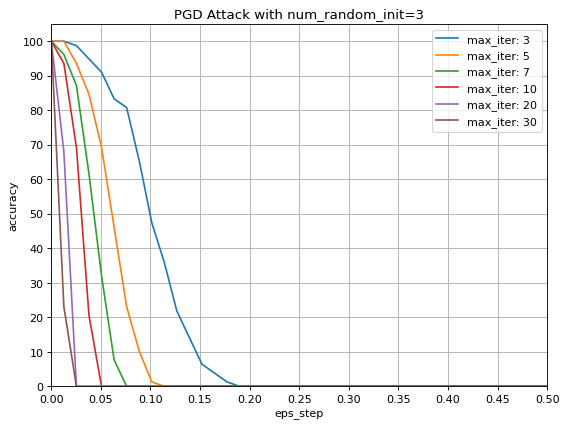

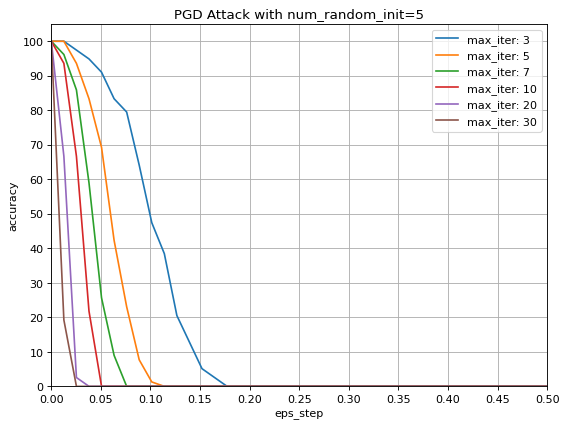

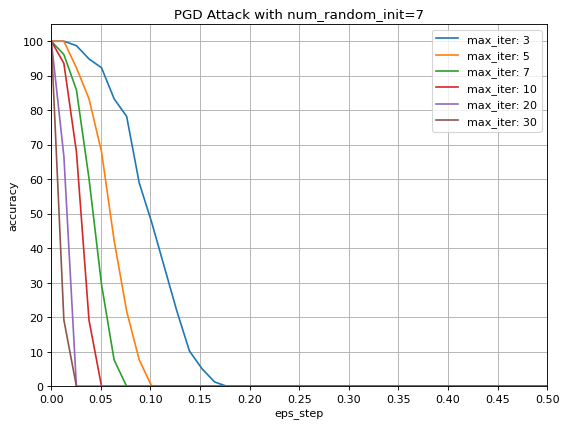

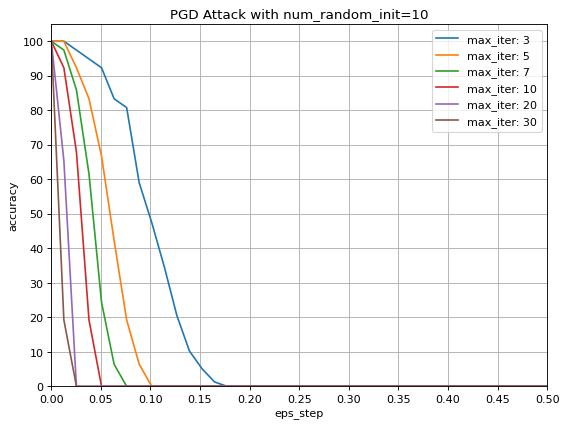

In [ ]:
df = pd.DataFrame(result_PGD_attack.items(), columns=('A','accuracy'))
df[['perturbation', 'eps_step', 'max_iter', 'num_random_init']] = pd.DataFrame(df['A'].tolist(), index=df.index)
df = df.drop('A', axis=1)
grouped = df.groupby('num_random_init')
for name, group in grouped:
  x_plot = list(group.groupby('max_iter')['eps_step'].apply(list).values)
  y_plot = list(group.groupby('max_iter')['accuracy'].apply(list).values)
  legend_plot = list(group.groupby('max_iter').groups.keys())
  legend_plot = ['max_iter: '+str(x) for x in legend_plot]
  plot_parameter(x=x_plot, y=y_plot, label=('eps_step', 'accuracy'),  range_x=(0,0.5), legend=legend_plot, filename='PGD_eps_max_num'+str(name)+'_acc', title='PGD Attack with num_random_init='+str(name))

### Carlini-Wagner

In [ ]:
%%capture
result_CW_attack = {}

binary_search_steps = 1
confidence = 0
max_iters = [1, 3, 5, 7, 10, 20, 30]
initial_consts = [1, 3, 5, 7, 10, 20, 30]
for initial_const in initial_consts:
  for max_iter in max_iters:
    for learning_rate in np.linspace(0.0001, 1, 50):
      attack = CarliniL2Method(classifier=classifier_logit, binary_search_steps=binary_search_steps, confidence=confidence, max_iter=max_iter, learning_rate=learning_rate, initial_const=initial_const, targeted=False)
      test_samples_adv = attack.generate(x_feature_test)
      loss_test, accuracy_test = model.evaluate(test_samples_adv, y_test)
      perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))
      result_CW_attack[(perturbation, learning_rate, max_iter, initial_const)] = accuracy_test*100

/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots
/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots
/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots
/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots
/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots
/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots
/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots


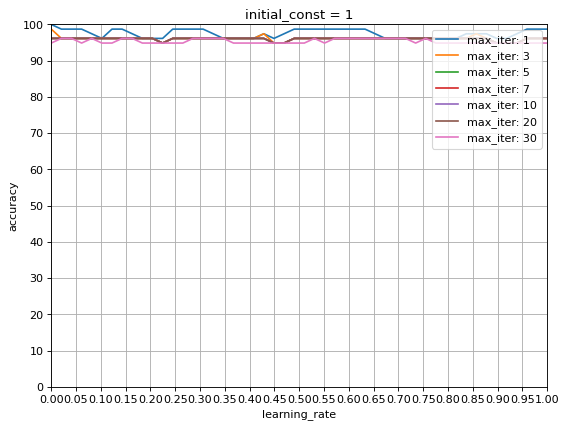

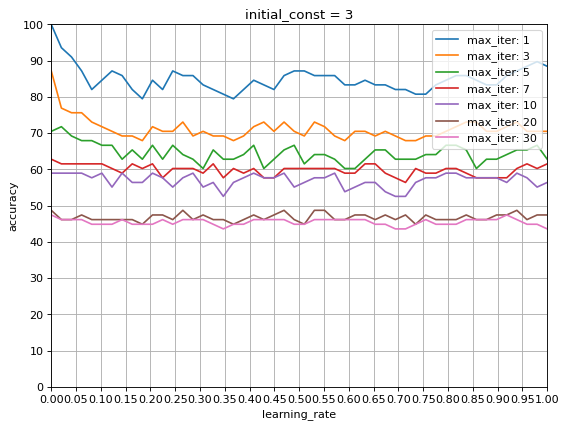

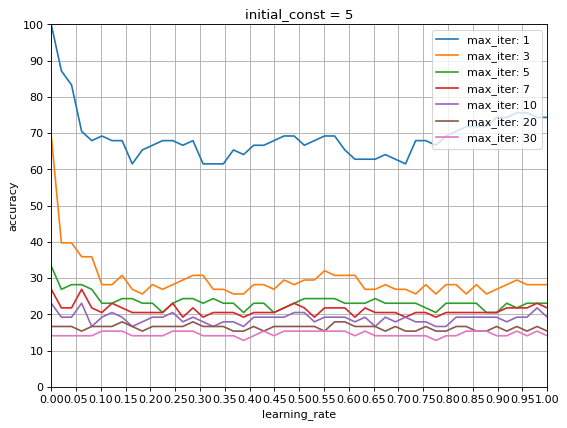

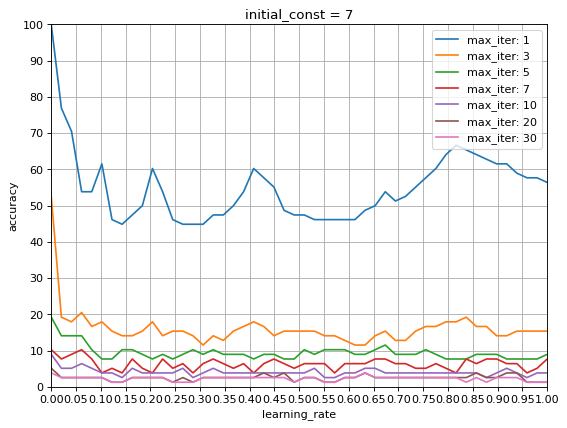

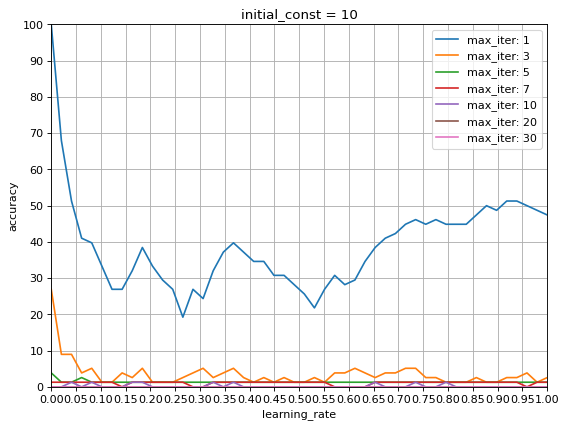

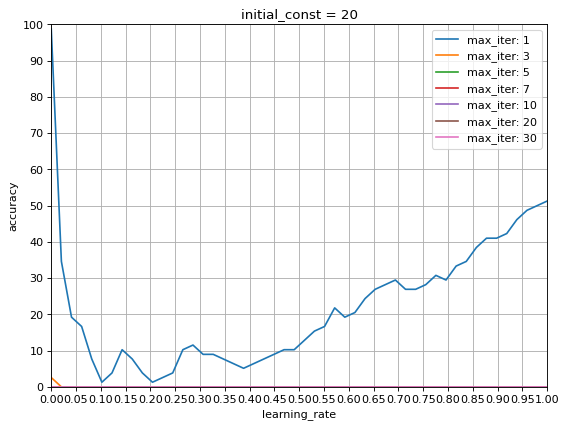

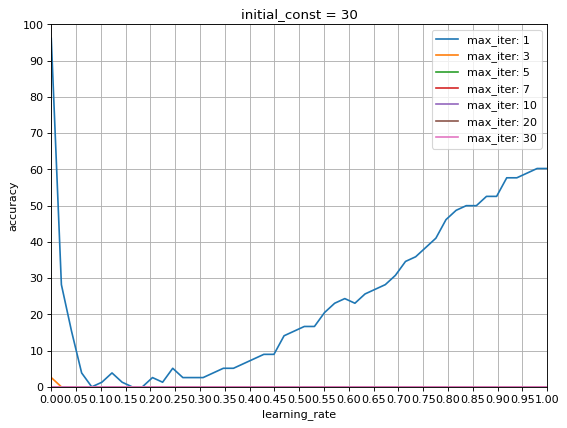

In [ ]:
df = pd.DataFrame(result_CW_attack.items(), columns=('A','accuracy'))
df[['perturbation', 'learning_rate', 'max_iter', 'initial_const']] = pd.DataFrame(df['A'].tolist(), index=df.index)
df = df.drop('A', axis=1)
grouped = df.groupby('initial_const')
for name, group in grouped:
  x_plot = list(group.groupby('max_iter')['learning_rate'].apply(list).values)
  y_plot = list(group.groupby('max_iter')['accuracy'].apply(list).values)
  legend_plot = list(group.groupby('max_iter').groups.keys())
  legend_plot = ['max_iter: '+str(x) for x in legend_plot]
  plot_parameter(x=x_plot, y=y_plot, label=('learning_rate', 'accuracy'),  range_x=(0,1), legend=legend_plot, title='initial_const = '+ str(name), filename='CW_initial_const_' + str(name))

/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots


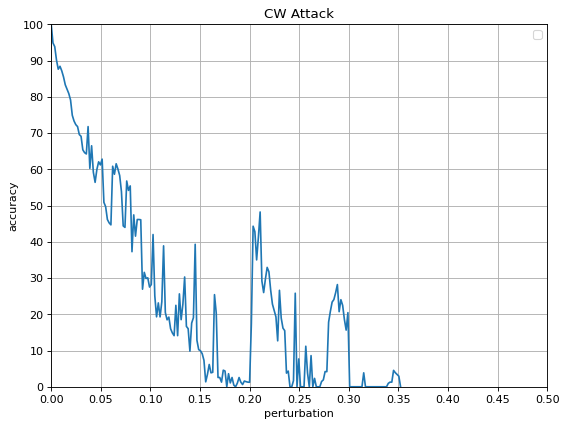

In [ ]:
result_CW_attack = collections.OrderedDict(sorted(result_CW_attack.items()))
x = [x[0] for x in result_CW_attack.keys()]
x_plot, y_plot = smoothing(x, list(result_CW_attack.values()), 200)
plot_parameter(x=[x_plot], y=[y_plot], label=('perturbation', 'accuracy'), range_x=(0,0.5), sort=True, filename='CW_pert_acc', title='CW Attack')

# Transferability

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(1, metric='cosine')

knn.fit(x_feature_train, y_train)

y_pred = knn.predict(x_feature_test)

accuracy = (y_pred == y_test).mean() * 100.
print('Accuracy on test test: ' + str(accuracy))

Accuracy on test test: 100.0


### FGSM

In [ ]:
result_FGSM_attack_knn = {}
for eps in np.linspace(0, 1, 100):
  FGSM_attack = FastGradientMethod(estimator=classifier, eps=eps, targeted=False)
  test_samples_adv = FGSM_attack.generate(x_feature_test)
  pred = knn.predict(test_samples_adv)
  perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))
  accuracy = (pred == y_test).mean() * 100.
  result_FGSM_attack_knn[perturbation] = accuracy

/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots


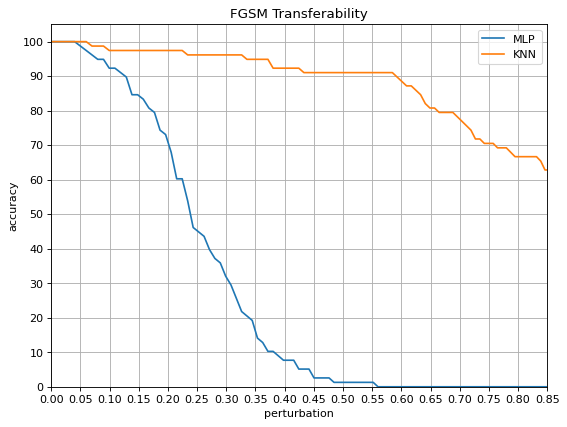

In [ ]:
x_plot, y_plot = compare_attacks(result_FGSM_attack, result_FGSM_attack_knn)
plot_parameter(x=x_plot, y=y_plot, label=('perturbation', 'accuracy'),  range_x=(0,0.85), legend=('MLP', 'KNN'), filename='FGSM_knn', title='FGSM Transferability')

### BIM

In [ ]:
%%capture
result_BIM_attack_knn = {}
x_plot = []
y_plot = []
max_iters = [3, 5, 7, 10, 20, 30]
for max_iter in max_iters:
  for eps_step in np.linspace(0.0001, 1, 100):
    epsilon = eps_step*max_iter
    BIM_attack = BasicIterativeMethod(estimator=classifier, eps=epsilon, eps_step=eps_step, max_iter=max_iter, targeted=False)
    test_samples_adv = BIM_attack.generate(x_feature_test)
    pred = knn.predict(test_samples_adv)
    perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))
    accuracy = (pred == y_test).mean() * 100.
    result_BIM_attack_knn[perturbation] = accuracy

/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots


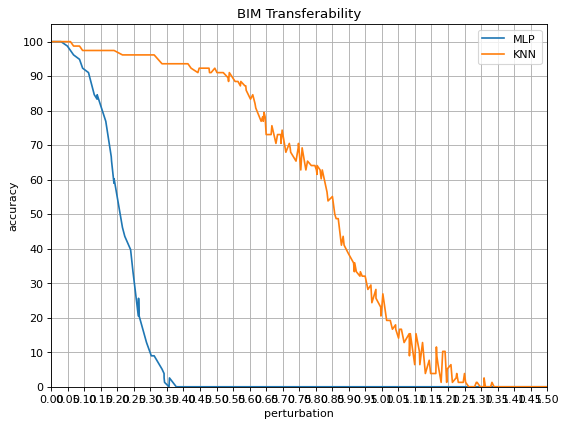

In [ ]:
x_plot, y_plot = compare_attacks(result_BIM_attack, result_BIM_attack_knn)
plot_parameter(x=x_plot, y=y_plot, label=('perturbation', 'accuracy'),  range_x=(0,1.5), legend=('MLP', 'KNN'), filename='BIM_knn', title='BIM Transferability')

### PGD

In [ ]:
%%capture
result_PGD_attack_knn = {}
num_random_inits = [1, 3, 5, 7, 10]
max_iters = [3, 5, 7, 10, 20, 30]
for num_random_init in num_random_inits:
  for max_iter in max_iters:
    for eps_step in np.linspace(0.0001, 1, 100):
      epsilon = eps_step*max_iter
      attack = ProjectedGradientDescent(estimator=classifier, eps=epsilon, eps_step=eps_step, max_iter=max_iter, num_random_init=num_random_init, targeted=False)
      test_samples_adv = attack.generate(x_feature_test)
      pred = knn.predict(test_samples_adv)
      perturbation = np.linalg.norm(test_samples_adv-x_feature_test)/len(x_feature_test)
      accuracy = (pred == y_test).mean() * 100.
      result_PGD_attack_knn[perturbation] = accuracy

/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots


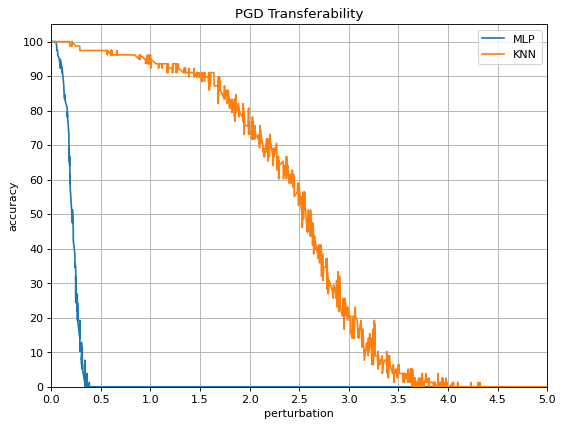

In [ ]:
x_plot, y_plot = compare_attacks(result_PGD_attack, result_PGD_attack_knn)
plot_parameter(x=x_plot, y=y_plot, label=('perturbation', 'accuracy'),  range_x=(0,5), legend=('MLP', 'KNN'), filename='PGD_knn', title='PGD Transferability')

### Carlini-Wagner

In [ ]:
%%capture
result_CW_attack_knn = {}
binary_search_steps = 1
confidence = 0
max_iters = [1, 3, 5, 7, 10, 20, 30]
initial_consts = [1, 3, 5, 7, 10, 20, 30]
for initial_const in initial_consts:
  for max_iter in max_iters:
    for learning_rate in np.linspace(0.0001, 1, 100):
      attack = CarliniL2Method(classifier=classifier_logit, binary_search_steps=binary_search_steps, confidence=confidence, max_iter=max_iter, learning_rate=learning_rate, initial_const=initial_const, targeted=False)
      test_samples_adv = attack.generate(x_feature_test)
      pred = knn.predict(test_samples_adv)
      perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))
      accuracy = (pred == y_test).mean() * 100.
      result_CW_attack_knn[perturbation] = accuracy

/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots


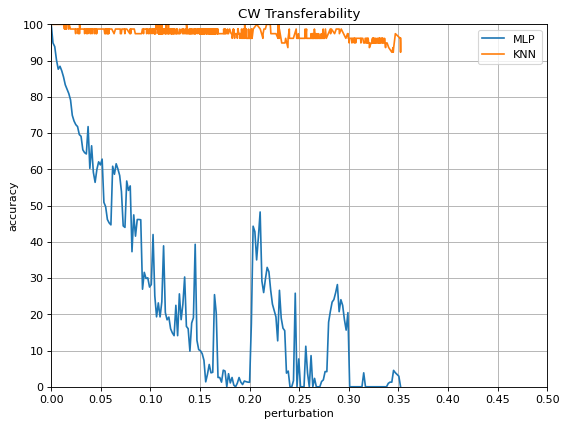

In [ ]:
x_plot, y_plot = compare_attacks(result_CW_attack, result_CW_attack_knn)
x_plot[0], y_plot[0] = smoothing(x_plot[0], y_plot[0], 200)
plot_parameter(x=x_plot , y=y_plot, label=('perturbation', 'accuracy'),  range_x=(0,0.5), legend=('MLP', 'KNN'), filename='CW_knn', title='CW Transferability')

# Adversarial Training

In [ ]:
from art.defences.trainer import AdversarialTrainer

#change the attack
attack_1 = FastGradientMethod(estimator=classifier, eps=0.4, targeted=False)
attack_2 = BasicIterativeMethod(estimator=classifier, eps=0.5, eps_step=0.05, max_iter=10, targeted=False)
attack_3 = ProjectedGradientDescent(estimator=classifier, eps=0.5, eps_step=0.05, max_iter=10, num_random_init=10, targeted=False)
attack_4 = CarliniL2Method(classifier=classifier_logit, binary_search_steps=1, confidence=0, max_iter=3, learning_rate=0.3, initial_const=10, targeted=False)

trainer = AdversarialTrainer(classifier, [attack_1, attack_2, attack_3, attack_4], ratio=1)
trainer.fit(x_feature_train, y_train, nb_epochs=25, batch_size=32)
robust_classifier = trainer.get_classifier()

Precompute adv samples:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Adversarial training epochs:   0%|          | 0/25 [00:00<?, ?it/s]

### Accuracy on clean samples

In [ ]:
pred = robust_classifier.predict(x_feature_test)
pred = np.argmax(pred, axis=1)
accuracy = (pred == y_test).mean() * 100.
print('Accuracy on test set after adversarial training: ' + str(accuracy))

Accuracy on test set after adversarial training: 97.43589743589743


### FGSM

In [ ]:
result_FGSM_defense = {}
for eps in np.linspace(0, 1, 100):
  attack = FastGradientMethod(estimator=classifier, eps=eps, targeted=False)
  test_samples_adv = attack.generate(x_feature_test)
  pred = robust_classifier.predict(test_samples_adv)
  pred = np.argmax(pred, axis=1)
  perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))
  accuracy = (pred == y_test).mean() * 100.
  result_FGSM_defense[perturbation] = accuracy

/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots


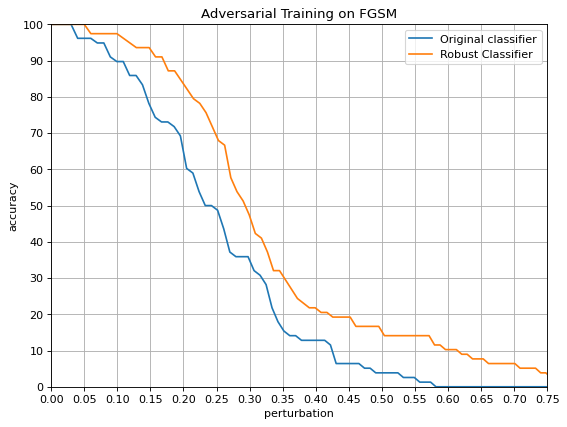

In [ ]:
x_plot, y_plot = compare_attacks(result_FGSM_attack, result_FGSM_defense)
plot_parameter(x=x_plot, y=y_plot, label=('perturbation', 'accuracy'),  range_x=(0,0.75), legend=('Original classifier', 'Robust Classifier'), filename='FGSM_def', title='Adversarial Training on FGSM')

### BIM

In [ ]:
%%capture
result_BIM_defense = {}
x_plot = []
y_plot = []
max_iters = [3, 5, 7, 10, 20, 30]
for max_iter in max_iters:
  for eps_step in np.linspace(0.0001, 1, 100):
    epsilon = eps_step*max_iter
    BIM_attack = BasicIterativeMethod(estimator=classifier, eps=epsilon, eps_step=eps_step, max_iter=max_iter, targeted=False)
    test_samples_adv = BIM_attack.generate(x_feature_test)
    pred = robust_classifier.predict(test_samples_adv)
    pred = np.argmax(pred, axis=1)
    perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))
    accuracy = (pred == y_test).mean() * 100.
    result_BIM_defense[perturbation] = accuracy

/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots


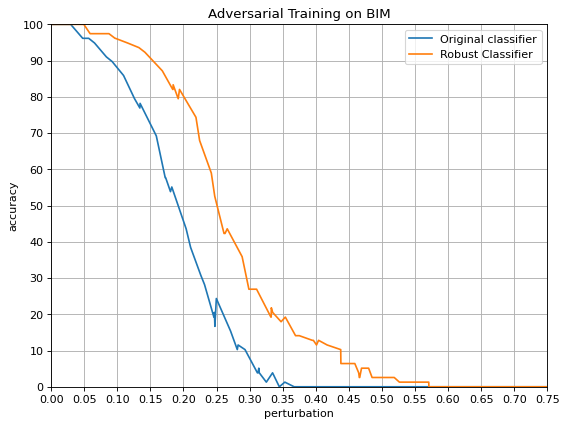

In [ ]:
x_plot, y_plot = compare_attacks(result_BIM_attack, result_BIM_defense)
plot_parameter(x=x_plot, y=y_plot, label=('perturbation', 'accuracy'),  range_x=(0,0.75), legend=('Original classifier', 'Robust Classifier'), filename='BIM_def', title='Adversarial Training on BIM')

### PGD

In [ ]:
%%capture
result_PGD_defense = {}
num_random_inits = [1, 3, 5, 7, 10]
max_iters = [3, 5, 7, 10, 20, 30]
for num_random_init in num_random_inits:
  for max_iter in max_iters:
    for eps_step in np.linspace(0.0001, 1, 80):
      epsilon = eps_step*max_iter
      attack = ProjectedGradientDescent(estimator=classifier, eps=epsilon, eps_step=eps_step, max_iter=max_iter, num_random_init=num_random_init, targeted=False)
      test_samples_adv = attack.generate(x_feature_test)
      pred = robust_classifier.predict(test_samples_adv)
      pred = np.argmax(pred, axis=1)
      perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))
      accuracy = (pred == y_test).mean() * 100.
      result_PGD_defense[perturbation] = accuracy

/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots


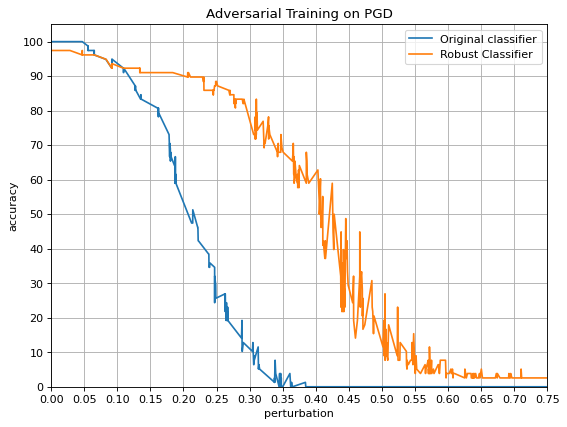

In [ ]:
x_plot, y_plot = compare_attacks(result_PGD_attack, result_PGD_defense)
plot_parameter(x=x_plot, y=y_plot, label=('perturbation', 'accuracy'),  range_x=(0,0.75), legend=('Original classifier', 'Robust Classifier'), filename='PGD_def', title='Adversarial Training on PGD')

### Carlini-Wagner

In [ ]:
%%capture
result_CW_defense = {}
binary_search_steps = 1
confidence = 0
max_iters = [1, 3, 5, 7, 10, 20, 30]
initial_consts = [1, 3, 5, 7, 10, 20, 30]
for initial_const in initial_consts:
  for max_iter in max_iters:
    for learning_rate in np.linspace(0.0001, 1, 100):
      attack = CarliniL2Method(classifier=classifier_logit, binary_search_steps=binary_search_steps, confidence=confidence, max_iter=max_iter, learning_rate=learning_rate, initial_const=initial_const, targeted=False)
      test_samples_adv = attack.generate(x_feature_test)
      pred = robust_classifier.predict(test_samples_adv)
      pred = np.argmax(pred, axis=1)
      perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))
      accuracy = (pred == y_test).mean() * 100.
      result_CW_defense[perturbation] = accuracy

/content/gdrive/MyDrive/Gruppo_AI4C - Copy/plots


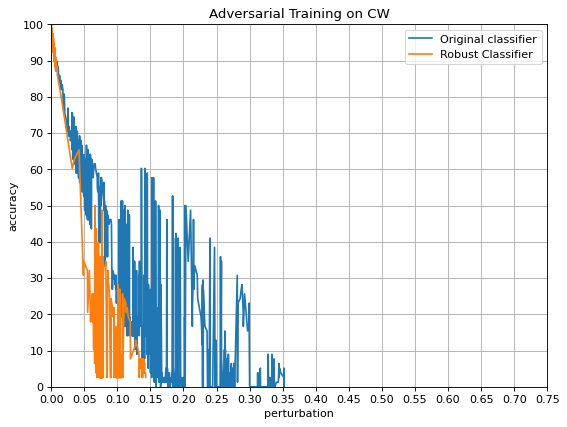

In [ ]:
x_plot, y_plot = compare_attacks(result_CW_attack, result_CW_defense)

plot_parameter(x=x_plot, y=y_plot, label=('perturbation', 'accuracy'),  range_x=(0,0.75), legend=('Original classifier', 'Robust Classifier'), filename='CW_def', title='Adversarial Training on CW')

# Detector

In [ ]:
x_train_fgsm = x_feature_train[0:110]
x_train_bim = x_feature_train[110:219]
x_train_pgd = x_feature_train[219:328]
x_train_cw = x_feature_train[328:439]
x_train_clean = np.concatenate([x_train_fgsm, x_train_bim, x_train_pgd, x_train_cw])

In [ ]:
attack_1 = FastGradientMethod(estimator=classifier, eps=0.5, targeted=False)
attack_2 = FastGradientMethod(estimator=classifier, eps=0.3, targeted=False)
attack_3 = BasicIterativeMethod(estimator=classifier, eps=0.5, eps_step=0.05, max_iter=10, targeted=False)
attack_4 = BasicIterativeMethod(estimator=classifier, eps=0.5, eps_step=0.07, max_iter=5, targeted=False)
attack_5 = ProjectedGradientDescent(estimator=classifier, eps=0.5, eps_step=0.05, max_iter=20, num_random_init=10, targeted=False)
attack_6 = ProjectedGradientDescent(estimator=classifier, eps=0.5, eps_step=0.07, max_iter=5, num_random_init=3, targeted=False)
attack_7 = CarliniL2Method(classifier=classifier_logit, binary_search_steps=1, confidence=0, max_iter=3, learning_rate=0.3, initial_const=10, targeted=False)
attack_8 = CarliniL2Method(classifier=classifier_logit, binary_search_steps=1, confidence=0, max_iter=7, learning_rate=0.25, initial_const=7, targeted=False)

In [ ]:
x_train_fgsm_attack = np.concatenate([attack_1.generate(x_train_fgsm[:int(x_train_fgsm.shape[0]/2)]), attack_2.generate(x_train_fgsm[int(x_train_fgsm.shape[0]/2):])])
x_train_bim_attack = np.concatenate([attack_3.generate(x_train_bim[:int(x_train_bim.shape[0]/2)]), attack_4.generate(x_train_bim[int(x_train_bim.shape[0]/2):])])
x_train_pgd_attack = np.concatenate([attack_5.generate(x_train_pgd[:int(x_train_pgd.shape[0]/2)]), attack_6.generate(x_train_pgd[int(x_train_pgd.shape[0]/2):])])
x_train_cw_attack = np.concatenate([attack_7.generate(x_train_cw[:int(x_train_cw.shape[0]/2)]), attack_8.generate(x_train_cw[int(x_train_cw.shape[0]/2):])])
x_train_adv = np.concatenate([x_train_fgsm_attack, x_train_bim_attack, x_train_pgd_attack, x_train_cw_attack])

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/5 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/5 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/10 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/10 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/3 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/5 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/5 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/5 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/3 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/5 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/5 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


C&W L_2:   0%|          | 0/55 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/55 [00:00<?, ?it/s]

In [ ]:
x_train_det = np.concatenate([x_train_clean, x_train_adv])
y_train_det = np.concatenate([np.zeros(x_feature_train.shape[0]), np.ones(x_feature_train.shape[0])])
print(x_train_det.shape)

(876, 512)


In [ ]:
from keras.models import Model
from keras.layers import Dense, Activation, Input

input = Input(shape=(512))
x = Dense(32, activation=tf.nn.relu)(input)
x = Dense(16, activation=tf.nn.relu)(x)
x = Dense(2)(x)
output = Activation(tf.nn.softmax)(x)
detector = Model(inputs=input, outputs=output)
detector.summary()

detector.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 512)]             0         
                                                                 
 dense_3 (Dense)             (None, 32)                16416     
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                                 
Total params: 16,978
Trainable params: 16,978
Non-trainable params: 0
_________________________________________________________________


In [ ]:
detector.fit(x=x_train_det, y=y_train_det, batch_size=64, epochs=30)

Train on 876 samples
Epoch 1/30
876/876 [==============================] - 0s 163us/sample - loss: 0.7662 - accuracy: 0.5183
Epoch 2/30
876/876 [==============================] - 0s 37us/sample - loss: 0.6455 - accuracy: 0.6005
Epoch 3/30
876/876 [==============================] - 0s 44us/sample - loss: 0.5269 - accuracy: 0.7546
Epoch 4/30
876/876 [==============================] - 0s 35us/sample - loss: 0.3779 - accuracy: 0.8756
Epoch 5/30
876/876 [==============================] - 0s 34us/sample - loss: 0.2587 - accuracy: 0.9395
Epoch 6/30
876/876 [==============================] - 0s 48us/sample - loss: 0.1811 - accuracy: 0.9692
Epoch 7/30
876/876 [==============================] - 0s 39us/sample - loss: 0.1323 - accuracy: 0.9795
Epoch 8/30
876/876 [==============================] - 0s 36us/sample - loss: 0.1027 - accuracy: 0.9909
Epoch 9/30
876/876 [==============================] - 0s 36us/sample - loss: 0.0833 - accuracy: 0.9897
Epoch 10/30
876/876 [==============================

In [ ]:
pred = detector.predict(x_feature_test)
pred = np.argmax(pred, axis=1)
print(pred)
#print('Accuracy on test set: ' + str(accuracy))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [ ]:
%cd '/content/gdrive/MyDrive/Gruppo_AI4C - Copy'
detector.save('detector.h5')

/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy


In [ ]:
from keras.models import load_model
%cd '/content/gdrive/MyDrive/Gruppo_AI4C - Copy'
detector = load_model('detector.h5')

/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy


### FGSM

In [ ]:
result_FGSM_detector = {}
for eps in np.linspace(0, 1, 100):
  FGSM_attack = FastGradientMethod(estimator=classifier, eps=eps, targeted=False)
  test_samples_adv = FGSM_attack.generate(x_feature_test)
  pred = detector.predict(test_samples_adv)
  pred = np.argmax(pred, axis=1)
  perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))
  y_test_det = np.ones(test_samples_adv.shape[0])
  accuracy = (pred == y_test_det).mean() * 100.
  result_FGSM_detector[(perturbation)] = accuracy

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots


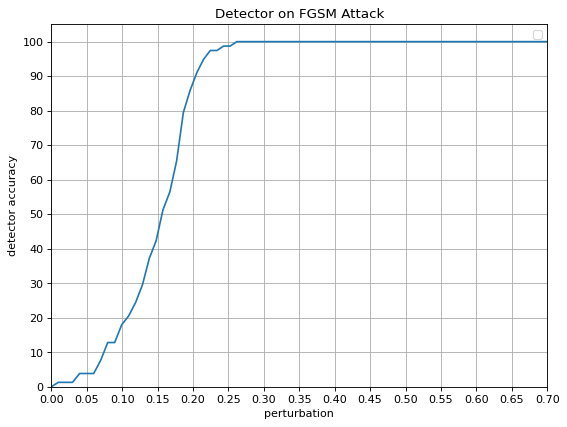

In [ ]:
plot_parameter(data=result_FGSM_detector, range_x=(0,0.7), label=('perturbation', 'detector accuracy'), filename='FGSM_det', title='Detector on FGSM Attack')

In [ ]:
result_FGSM_detector_total = {}
for eps in np.linspace(0, 1, 100):
  FGSM_attack = FastGradientMethod(estimator=classifier, eps=eps, targeted=False)
  test_samples_adv = FGSM_attack.generate(x_feature_test)
  pred_det = detector.predict(test_samples_adv)
  pred_det = np.argmax(pred_det, axis=1)
  idx = np.where(pred_det == 0)[0]
  if len(idx) != 0:
    pred_cls = model.predict(np.take(test_samples_adv, idx, axis=0))
    pred_cls = np.argmax(pred_cls, axis=1)
    accuracy_cls = (pred_cls == np.take(y_test, idx, axis=0)).sum()/y_test.shape[0] * 100.
  else:
    accuracy_cls = 0
  perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))

  y_test_det = np.ones(test_samples_adv.shape[0])
  accuracy_det = (pred_det == y_test_det).mean() * 100.
  accuracy = accuracy_det + accuracy_cls
  result_FGSM_detector_total[(perturbation)] = accuracy

/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots


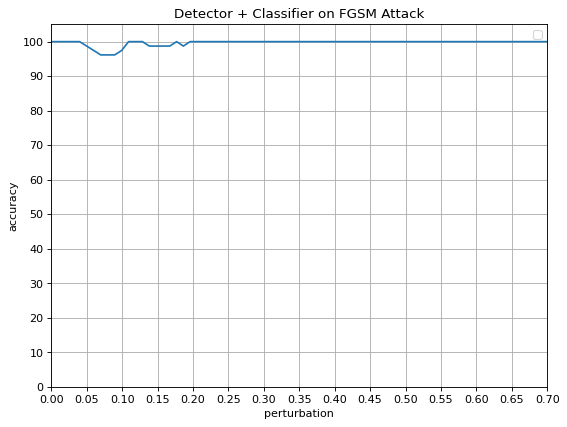

In [ ]:
plot_parameter(data=result_FGSM_detector_total, range_x=(0,0.7), label=('perturbation', 'accuracy'), filename='FGSM_det_total', title='Detector + Classifier on FGSM Attack')

### BIM

In [ ]:
%%capture
result_BIM_detector = {}
x_plot = []
y_plot = []
max_iters = [3, 5, 7, 10, 20, 30]
for max_iter in max_iters:
  for eps_step in np.linspace(0.0001, 1, 80):
    epsilon = eps_step*max_iter
    BIM_attack = BasicIterativeMethod(estimator=classifier, eps=epsilon, eps_step=eps_step, max_iter=max_iter, targeted=False)
    test_samples_adv = BIM_attack.generate(x_feature_test)
    pred_det = detector.predict(test_samples_adv)
    pred_det = np.argmax(pred_det, axis=1)
    perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))
    y_test_det = np.ones(test_samples_adv.shape[0])
    accuracy = (pred_det == y_test_det).mean() * 100.
    result_BIM_detector[(perturbation)] = accuracy

/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots


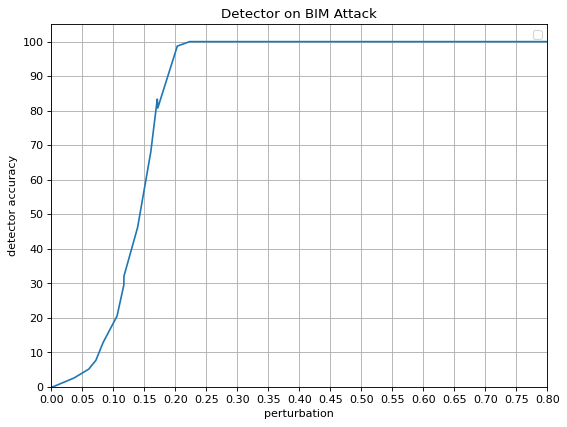

In [ ]:
plot_parameter(data=result_BIM_detector, range_x=(0,0.8), label=('perturbation', 'detector accuracy'), filename='BIM_det', title='Detector on BIM Attack', sort=True)

In [ ]:
%%capture
result_BIM_detector_total = {}
x_plot = []
y_plot = []
max_iters = [3, 5, 7, 10, 20, 30]
for max_iter in max_iters:
  for eps_step in np.linspace(0.0001, 1, 100):
    epsilon = eps_step*max_iter
    BIM_attack = BasicIterativeMethod(estimator=classifier, eps=epsilon, eps_step=eps_step, max_iter=max_iter, targeted=False)
    test_samples_adv = BIM_attack.generate(x_feature_test)
    pred_det = detector.predict(test_samples_adv)
    pred_det = np.argmax(pred_det, axis=1)
    idx = np.where(pred_det == 0)[0]
    if len(idx) != 0:
      pred_cls = model.predict(np.take(test_samples_adv, idx, axis=0))
      pred_cls = np.argmax(pred_cls, axis=1)
      accuracy_cls = (pred_cls == np.take(y_test, idx, axis=0)).sum()/y_test.shape[0] * 100.
    else:
      accuracy_cls = 0
    perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))
    y_test_det = np.ones(test_samples_adv.shape[0])
    accuracy_det = (pred_det == y_test_det).mean() * 100.
    accuracy = accuracy_det + accuracy_cls
    result_BIM_detector_total[(perturbation)] = accuracy


/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots


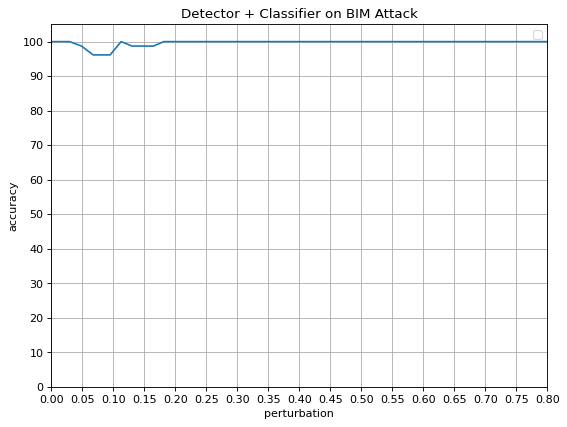

In [ ]:
plot_parameter(data=result_BIM_detector_total, range_x=(0,0.8), label=('perturbation', 'accuracy'), filename='BIM_det_total', title='Detector + Classifier on BIM Attack', sort=True)

### PGD

In [ ]:
%%capture
result_PGD_detector = {}
result_PGD_detector_total = {}

num_random_inits = [1, 3, 5, 7, 10]
max_iters = [3, 5, 7, 10, 20, 30]
for num_random_init in num_random_inits:
  for max_iter in max_iters:
    for eps_step in np.linspace(0.0001, 1, 80):
      epsilon = eps_step*max_iter
      attack = ProjectedGradientDescent(estimator=classifier, eps=epsilon, eps_step=eps_step, max_iter=max_iter, num_random_init=num_random_init, targeted=False)
      test_samples_adv = attack.generate(x_feature_test)
      pred_det = detector.predict(test_samples_adv)
      pred_det = np.argmax(pred_det, axis=1)
      idx = np.where(pred_det == 0)[0]
      if len(idx) != 0:
        pred_cls = model.predict(np.take(test_samples_adv, idx, axis=0))
        pred_cls = np.argmax(pred_cls, axis=1)
        accuracy_cls = (pred_cls == np.take(y_test, idx, axis=0)).sum()/y_test.shape[0] * 100.
      else:
        accuracy_cls = 0
      perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))
      y_test_det = np.ones(test_samples_adv.shape[0])
      accuracy_det = (pred_det == y_test_det).mean() * 100.
      accuracy = accuracy_cls + accuracy_det

      result_PGD_detector[(perturbation)] = accuracy_det
      result_PGD_detector_total[(perturbation)] = accuracy

In [ ]:
plot_parameter(data=result_PGD_detector, range_x=(0,2), label=('perturbation', 'detector accuracy'), title='Detector on PGD Attack', sort=True)

/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots


/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots


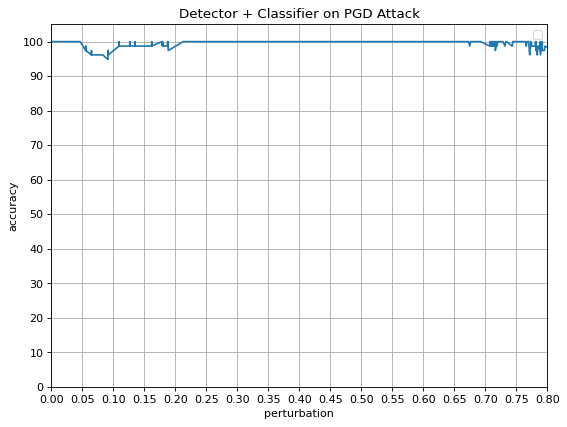

In [ ]:
plot_parameter(data=result_PGD_detector_total, range_x=(0,0.8), label=('perturbation', 'accuracy'), title='Detector + Classifier on PGD Attack', sort=True)

### Carlini-Wagner

In [ ]:
%%capture
result_CW_detector = {}
result_CW_detector_total = {}

binary_search_steps = 1
confidence = 0
max_iters = [1, 3, 5, 10, 20, 30]
initial_consts = [1, 3, 5, 10, 20, 30]
for initial_const in initial_consts:
  for max_iter in max_iters:
    for learning_rate in np.linspace(0.0001, 1, 50):
      attack = CarliniL2Method(classifier=classifier_logit, binary_search_steps=binary_search_steps, confidence=confidence, max_iter=max_iter, learning_rate=learning_rate, initial_const=initial_const, targeted=False)
      test_samples_adv = attack.generate(x_feature_test)
      pred_det = detector.predict(test_samples_adv)
      pred_det = np.argmax(pred_det, axis=1)
      idx = np.where(pred_det == 0)[0]
      if len(idx) != 0:
        pred_cls = model.predict(np.take(test_samples_adv, idx, axis=0))
        pred_cls = np.argmax(pred_cls, axis=1)
        accuracy_cls = (pred_cls == np.take(y_test, idx, axis=0)).sum()/y_test.shape[0] * 100.
      else:
        accuracy_cls = 0
      perturbation = np.mean(np.abs((test_samples_adv-x_feature_test)))
      y_test_det = np.ones(test_samples_adv.shape[0])
      accuracy_det = (pred_det == y_test_det).mean() * 100.
      accuracy = accuracy_cls + accuracy_det

      result_CW_detector[(perturbation)] = accuracy_det
      result_CW_detector_total[(perturbation)] = accuracy

/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots


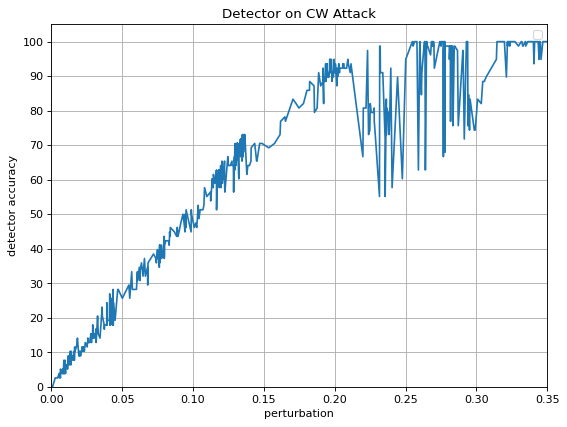

In [ ]:
plot_parameter(data=result_CW_detector, range_x=(0,0.35), label=('perturbation', 'detector accuracy'), filename='CW_det', title='Detector on CW Attack', sort=True)

/content/gdrive/.shortcut-targets-by-id/1Ck_NrCM1hZZ_TVvZIWPR_w1P24mgXgxb/Gruppo_AI4C - Copy/plots


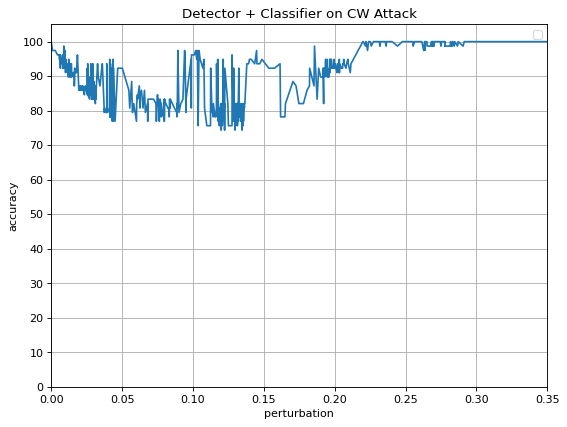

In [ ]:
plot_parameter(data=result_CW_detector_total, range_x=(0,0.35), label=('perturbation', 'accuracy'), filename='CW_det_total', title='Detector + Classifier on CW Attack', sort=True)